Report:
*   team members:
    1.   Ailing Li - ailingl2
    2.   Jesse Anderson - jander98
    3.   Kevin Nguyen - kn28

*   **Contribution from Ailing**
  - Tasks completed:
-   **Contribution from Jesse**
  - Tasks completed:
-   **Contribution from Kevin**
    - Tasks completed:

## Part I: Implement Lasso
### One-variable Lasso
First, write a function one_var_lasso that takes the following inputs:

\begin{aligned}
v = \begin{pmatrix}
v_1 & v_2 & \cdots & v_n
\end{pmatrix}^t,
\end{aligned}

\begin{aligned}
z = \begin{pmatrix}
z_1 & z_2 & \cdots & z_n
\end{pmatrix}^t ,
\end{aligned}

\begin{aligned}
\lambda > 0
\end{aligned}

and solves the following one-variable Lasso problem:
$$
\min_b { \frac{1}{2n} \sum_{i=1}^n (v_i - b z_i)^2 + \lambda |b|}
=
\min_b { \frac{1}{2n} \|v - b \cdot z\|^2 + \lambda |b|}
$$

In [ ]:
# download Coding 2 datasets
# It can be deleted later when submitting

download.file("https://raw.githubusercontent.com/e76971072/CS598-Coding2-Datasets/master/Coding2_Data0.csv",
              destfile = "Coding2_Data0.csv")
download.file("https://raw.githubusercontent.com/e76971072/CS598-Coding2-Datasets/master/Coding2_Data1.csv",
              destfile = "Coding2_Data1.csv")

download.file("https://raw.githubusercontent.com/e76971072/CS598-Coding2-Datasets/master/Coding2_Data2.csv",
              destfile = "Coding2_Data2.csv")
download.file("https://raw.githubusercontent.com/e76971072/CS598-Coding2-Datasets/master/Coding2_lasso_coefs.csv",
              destfile = " Coding2_lasso_coefs.csv")

download.file("https://github.com/e76971072/CS598-Coding2-Datasets/blob/master/glmnet_4.1-8.tar.gz",
              destfile = "glmnet_4.1-7.tar.gz")

download.file("https://github.com/e76971072/CS598-Coding2-Datasets/blob/master/glmnet_4.1-8.tar.gz",
              destfile = "pls_4.3.tar.gz")


In [ ]:
# install necessary libraries for the entire document
# install.packages("pls_4.3.tar.gz", repos = NULL, type = "source")
# install.packages("glmnet_4.1-7.tar.gz", repos = NULL, type = "source")
install.packages("pls")
install.packages("glmnet")
install.packages("doParallel")
install.packages("forEach")
install.packages("doRNG")
install.packages("reshape2")
#~2 min for install

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘shape’, ‘RcppEigen’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘forEach’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
Warning message:
“Perhaps you meant ‘foreach’ ?”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# added by Ailing
one_var_lasso = function(v, z, lam) {
  n = length(v)

  # Compute v^T * z (dot product)
  v_transpose_z = sum(v * z)

  # Compute ||z||^2 (squared norm of z)
  norm_z_squared = sum(z^2)

  # check for denominator
  if (norm_z_squared == 0){
    return (0)
  }

  # Compute a
  a = v_transpose_z / norm_z_squared
  sign_a = sign(a) #positive return 1, negative return -1

  # Compute eta
  eta = (2 * n * lam) / norm_z_squared

  # Compute x*
  x_star = sign_a * max((abs(a) - eta / 2), 0)
  return (x_star)
}

### The CD Algorithm

Next, write your own function MyLasso to implement the Coordinate Descent (CD) algorithm by repeatedly calling one_var_lasso.
In the CD algorithm, at each iteration, we solve a one-variable Lasso problem for βj while holding the other (p-1) coefficients at their current values:
$$
\min_{\beta_j} { \frac{1}{2n} \sum_{i=1}^n \left( y_i - \sum_{k \neq j} X_{ik} \beta_k - X_{ij} \beta_j \right)^2 + \lambda \sum_{k \neq j} |\beta_k| + \lambda |\beta_j| }
$$

which is equivalent to solving the following one-variable Lasso problem
$$
\min_{\beta_j} { \frac{1}{2n} \sum_{i=1}^n \left( v_i - x_{ij} \beta_j \right)^2 + \lambda |\beta_j|},
\quad v_i = y_i - \sum_{k \neq j} x_{ik} \beta_k
$$

In [ ]:
# Added by Kevin
MyLasso = function(X, y, lam.seq, maxit = 100) {

    # Input
    # X: n-by-p design matrix without the intercept
    # y: n-by-1 response vector
    # lam.seq: sequence of lambda values (arranged from large to small)
    # maxit: number of updates for each lambda

    # Output
    # B: a (p+1)-by-length(lam.seq) coefficient matrix
    #    with the first row being the intercept sequence


    n = length(y)
    p = dim(X)[2]
    nlam = length(lam.seq)
    B = matrix(0, ncol = nlam, nrow = (p+1))
    rownames(B) = c("Intercept", colnames(X))

    ##############################
    # YOUR CODE:
    # (1) new.X = centered & scaled X;
    # (2) record the centers and scales used in (1)
    ##############################

    new.X  = matrix(0, nrow = nrow(X), ncol = ncol(X)) # create matrix fill with 0 by nRow x nCol


    for (i in 1:p) { # looping through number of column in X
      col_mean  = mean(X[, i])  # Calculate the mean of the column
      col_sd  = sd(X[, i])      # Calculate the standard deviation of the column
      new.X[, i]  =  (X[, i] - col_mean) / col_sd  # Center and scale value new.X at i
    }

    # Initialize coef vector b and residual vector r
    b = rep(0, p)
    r = y

    # Triple nested loop
    for (m in 1:nlam) {
      for (step in 1:maxit) {
        for (j in 1:p) {
          r = r + (new.X[, j] * b[j])
          b[j] = one_var_lasso(r, new.X[, j], lam.seq[m])
          r = r - new.X[, j] * b[j]
        }
      }
      B[-1, m] = b
    }

    ##############################
    # YOUR CODE:
    # scale back the coefficients;
    # update the intercepts stored in B[1, ]
    ##############################
    n_lam = dim(B)[2]

    rescaled_B = B[-1, ]

    for (j in 1:dim(rescaled_B)[1]) {
      rescaled_B[j, ] = B[j + 1, ] / apply(X, 2, sd)[j]  # rescale coefficient in B
    }

    # Calculate intercepts
    Intercept = numeric(n_lam)  # Initialize vector for intercepts
    for (m in 1:n_lam) {
      Intercept[m] = mean(y) - sum(rescaled_B[, m] * colMeans(X)) #  Calculates the intercept for the mth lambda value and stores it in the Intercept vector.
    }

    # binding Intercept and scaled B together
    B = rbind(Intercept, rescaled_B)

    return(B)
}

### Test Your Function

Download the data set Coding2_Data0.csv. The data set has 13 predictors, V1 to V13, and one response vector Y.

Test your function MyLasso on the data set Coding2_Data0.csv with a specific lambda sequence. Refer to the sample code in R/Python for the specified lambda sequence.



In [ ]:
myData = read.csv("Coding2_Data0.csv")
X = as.matrix(myData[, -14])
y = myData$Y
lam.seq = exp(seq(-1, -8, length.out = 80))
myout = MyLasso(X, y, lam.seq)

 - Check the accuracy of your function against the output from glmnet. The maximum difference between the two coefficient matrices should be less than 0.005.

In [ ]:
library(glmnet)
lasso.fit = glmnet(X, y, alpha = 1, lambda = lam.seq)
max(abs(coef(lasso.fit) - myout))

[1] 0.00456362

[1] 696
[1] 506
[1] -190


 - Produce a path plot for the 13 non-intercept coefficients along the lambda values in log scale.

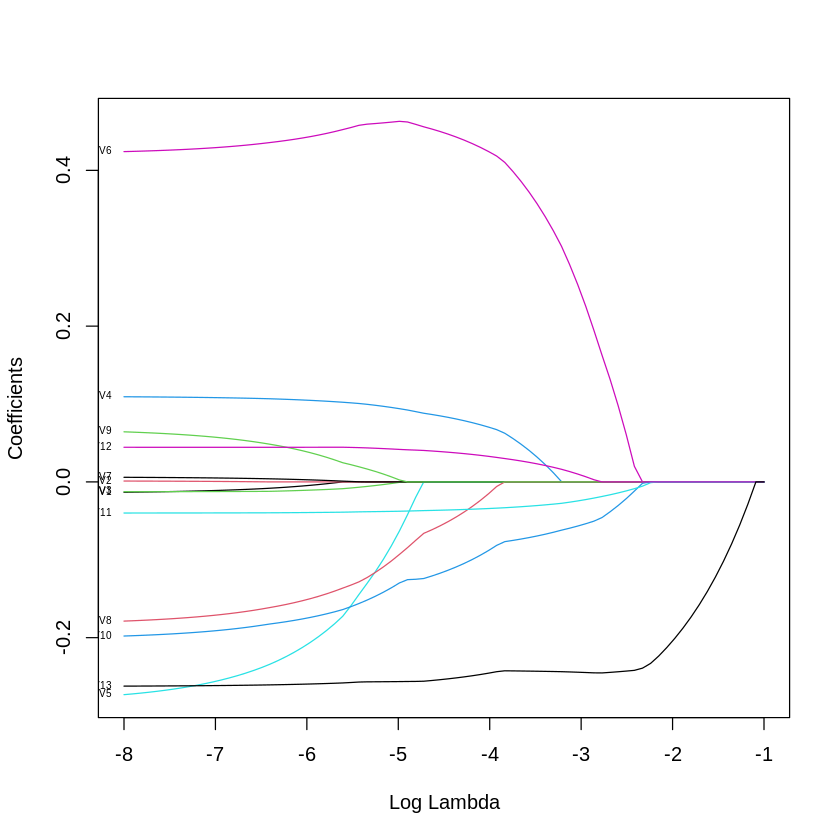

In [ ]:
x.index = log(lam.seq)
beta = myout[-1, ]  # beta is a 13-by-80 matrix
matplot(x.index, t(beta),
        xlim = c(min(x.index), max(x.index)),
        lty = 1,
        xlab = "Log Lambda",
        ylab = "Coefficients",
        type="l",
        lwd = 1)
# You can add variable names to each path
var.names = colnames(X)
nvar = length(var.names)
xpos = rep(min(x.index), nvar)
ypos = beta[, ncol(beta)]
text(xpos, ypos, var.names, cex=0.5, pos=2)

Your plot should look almost the same as the plot from glmnet

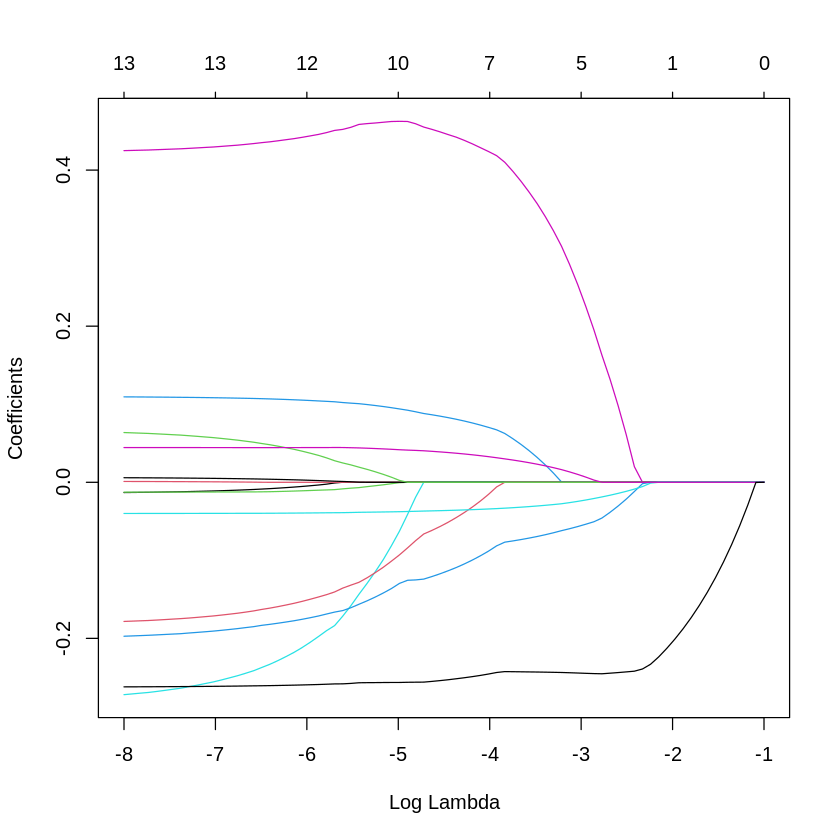

In [ ]:
plot(lasso.fit, xvar = "lambda")

Compare the estimated Lasso coefficients from your function with those provided in Coding2_lasso_coefs.csv. The maximum difference between the two coefficient matrices should be **less than 0.005**.
Refer to the sample code for instructions on how to read in the coefficients from Coding2_lasso_coefs.csv.

In [ ]:
lasso_coefs = read.csv("Coding2_lasso_coefs.csv")
lasso_coefs_m = as.matrix(lasso_coefs)
max(myout - lasso_coefs_m)

Warning message in file(file, "rt"):
“cannot open file 'Coding2_lasso_coefs.csv': No such file or directory”


ERROR: Error in file(file, "rt"): cannot open the connection



## Part II: Simulation Study

Consider the following **six** procedures:

  - **Full**: Fit a linear regression model using all features
  - **Ridge.min**: Ridge regression using lambda.min
  - **Lasso.min** and **Lasso.1se**: Lasso using lambda.min or lambda.1se
  - **L.Refit**: Refit the model selected by Lasso using lambda.1se
  -	**PCR**: principle components regression with the number of components chosen by 10-fold cross validation

### Case I

Download the data set Coding2_Data1.csv. The first 14 columns are the same as the data set we used in Part I with Y being the response variable (moved to the 1st column). The additional 78 more predictors are the quadratic and pairwise product terms of the original 13 predictors.

In [ ]:
run_simulation <- function(data, T = 50, methods = c("Full", "Ridge.min", "Lasso.min", "Lasso.1se", "L.Refit", "PCR"), PARALLEL = FALSE) {

  # Load necessary libraries
  library(glmnet) #Ridge and Lasso Regression
  library(pls) #For Principal Component Regression(PCR)

  # Check for valid method names, stop if wrong names
  valid_methods = c("Full", "Ridge.min", "Lasso.min", "Lasso.1se", "L.Refit", "PCR")
  if (!all(methods %in% valid_methods)) {
    stop("Invalid method(s) specified in 'methods' parameter.")
  }
  #If we are parallelizing we load necessary libraries
  if (PARALLEL) {
    library(doParallel) #general parallel backend support
    library(foreach) #Looping in paralel
    library(doRNG) #reproducibility in parallel
  }

  # Prepare data
  X = data.matrix(data[,-1])
  Y = data[,1]
  n = length(Y)
  ntest = round(n * 0.25) #Test set size [25% of data]
  ntrain = n - ntest #Training set size [remaining 75%]

  # Generate indices for test sets
  set.seed(2913)  # For reproducibility
  all.test.id = replicate(T, sample(1:n, ntest)) #random test indiices for each iter

  # Initialize vectors to store MSPEs for selected methods
  MSPEs = list()
  for (method in methods) {
    MSPEs[[method]] = numeric(T)
  }

  # Define lambda sequence for Ridge (as per your code)
  mylasso.lambda.seq = exp(seq(-10, 1, length.out = 100))

  # Set up parallel backend if PARALLEL is TRUE
  if (PARALLEL) {
    numCores <- parallel::detectCores() - 1  # Leave one core free, detect cores
    cl <- makeCluster(numCores) #parallel cluster init
    registerDoParallel(cl) #register parallel backend
    library(doRNG) #double check, may be excess. Backcheck later.
    set.seed(2913)  # For reproducibility in parallel
    `%dopar%` <- `%dorng%`  # Use doRNG for reproducible parallel loops
  } else {
    `%dopar%` <- foreach::`%do%` #else sequential exec
  }

  # Now run the simulations, will do in paralle or sequential depending on arg
  results <- foreach(t = 1:T, .packages = c('glmnet', 'pls')) %dopar% {
    # Initialize a list to store results for this iteration
    res = list()

    # Split data into training and testing sets
    test.id = all.test.id[, t]
    train.id = setdiff(1:n, test.id)

    # Full model (Ordinary Least Squares)
    if ("Full" %in% methods) {
      full.model = lm(Y ~ ., data = data[train.id, ])
      Ytest.pred = predict(full.model, newdata = data[test.id, ])
      res$Full = mean((data$Y[test.id] - Ytest.pred)^2)
    }

    # Ridge regression using lambda.min
    if ("Ridge.min" %in% methods) {
      #Cross validation for Ridge
      cv.out = cv.glmnet(X[train.id, ], Y[train.id], alpha = 0, lambda = mylasso.lambda.seq)
      #Get best lambda(lambda.min)
      best.lam = cv.out$lambda.min
      #Predict on test set
      Ytest.pred = predict(cv.out, s = best.lam, newx = X[test.id, ])
      #Calc MSPE for ridge regression
      res$Ridge.min = mean((Y[test.id] - Ytest.pred)^2)
    }

    # Lasso regression (uses default lambda sequence per example code)
    if (any(c("Lasso.min", "Lasso.1se", "L.Refit") %in% methods)) {
      #Perform cross validation for lasso
      cv.out = cv.glmnet(X[train.id, ], Y[train.id], alpha = 1)
    }

    # Lasso.min
    if ("Lasso.min" %in% methods) {
      best.lam = cv.out$lambda.min
      #predict on test set
      Ytest.pred = predict(cv.out, s = best.lam, newx = X[test.id, ])
      #calc MSPE for lasso
      res$Lasso.min = mean((Y[test.id] - Ytest.pred)^2)
    }

    # Lasso.1se [less agressive regularization]
    if ("Lasso.1se" %in% methods) {
      best.lam = cv.out$lambda.1se
      Ytest.pred = predict(cv.out, s = best.lam, newx = X[test.id, ])
      res$Lasso.1se = mean((Y[test.id] - Ytest.pred)^2)
    }

    # Lasso refit
    if ("L.Refit" %in% methods) {
      best.lam = cv.out$lambda.1se
      mylasso.coef = predict(cv.out, s = best.lam, type = "coefficients")
      var.sel = row.names(mylasso.coef)[which(mylasso.coef != 0)[-1]]
      if (length(var.sel) > 0) {
        mylasso.refit = lm(Y ~ ., data[train.id, c("Y", var.sel)])
        Ytest.pred = predict(mylasso.refit, newdata = data[test.id, ])
        res$L.Refit = mean((Ytest.pred - Y[test.id])^2)
      } else {
        # If no variables selected, predict using mean of training Y
        Ytest.pred = mean(Y[train.id])
        res$L.Refit = mean((Y[test.id] - Ytest.pred)^2)
      }
    }

    # PCR
    if ("PCR" %in% methods) {
      mypcr = pcr(Y ~ ., data = data[train.id, ], validation = "CV", scale = TRUE)
      CVerr = RMSEP(mypcr)$val[1, , ]
      best.ncomp = which.min(CVerr) - 1  # Adjust index
      if (best.ncomp == 0) { #handle one off case
        Ytest.pred = mean(Y[train.id])
      } else {
        Ytest.pred = predict(mypcr, data[test.id, ], ncomp = best.ncomp)
      }
      res$PCR = mean((Ytest.pred - Y[test.id])^2)
    }

    return(res)
  }

  # Stop the parallel backend if used
  if (PARALLEL) {
    stopCluster(cl)
  }

  # Collect results
  for (t in 1:T) {
    res = results[[t]]
    for (method in names(res)) {
      MSPEs[[method]][t] = res[[method]]
    }
  }

  # Return MSPEs
  return(MSPEs)
}


myData = read.csv("Coding2_Data1.csv", header = TRUE)

# Measure time for parallel execution
#time_parallel <- system.time({
#  MSPEs_parallel = run_simulation(data = myData, T = 50, PARALLEL = TRUE)
#})

# Measure time for non-parallel execution
#time_non_parallel <- system.time({
#  MSPEs_non_parallel = run_simulation(data = myData, T = 50, PARALLEL = FALSE)
#})

# Output the times
#at("Time for parallel execution:\n")
#print(time_parallel)
#cat("Time for non-parallel execution:\n")
#print(time_non_parallel)
#example default run all, par true
MSPEs = run_simulation(data = myData, T = 50, PARALLEL = TRUE)

#example default run all, par false
#MSPEs = run_simulation(data = myData, T = 50, PARALLEL = FALSE)
#example run two
#MSPEs = run_simulation(data = myData, T = 50, methods = c("Lasso.min", "Ridge.min"), PARALLEL = FALSE)

#sumMe
# Summarize MSPEs for all methods
summary_df = data.frame(
  Method = names(MSPEs),
  Mean_MSPE = sapply(MSPEs, mean),
  SD_MSPE = sapply(MSPEs, sd)
)


#plotMe
library(reshape2)
library(ggplot2)
library(knitr)

# Combine MSPEs into a data frame for plotting
MSPEs_melted = melt(MSPEs) #melt didn't work with renaming so rename below

# Rename columns to 'Method' and 'MSPE'
colnames(MSPEs_melted) = c("Method", "MSPE")

kable(summary_df,
      col.names = c("Method", "MSPE", "SD_MSPE"),
      align = "c",
      caption = "Case 1 MSPEs of Different Procedures over 50 Simulations: ",
      row.names = FALSE)

# Plotting the results
ggplot(MSPEs_melted, aes(x = MSPE, y = Method)) +
  geom_jitter(width = 0.2, alpha = 0.5, color = "blue") +
  geom_boxplot(alpha = 0.7, outlier.shape = NA, fill = "lightblue") +
  theme_bw() +
  labs(title = "MSPEs of Different Procedures over 50 Simulations",
       x = "Method",
       y = "MSPE") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

In [ ]:
#Load libraries and data.
set.seed(2913)
library(glmnet)
library(pls)
myData = read.csv("Coding2_Data1.csv", header = TRUE)

-	[a] Conduct the following simulation exercise **50** times:
  
    –	In each iteration, randomly split the data into two parts, **75%** for training and **25%** for testing.
    
    –	For each of the **six** procedures, train a model using the training subset and generate predictions for the test subset. Record the **MSPE** (Mean Squared Prediction Error) based on these test data predictions.
    
  -	[b] Graphically summarize your findings on the MSPE using a strip chart, and consider overlaying a boxplot for additional insights.
  
  -	[c] Based on the outcomes of your simulation study, please address the following questions:
  
    –	Which procedure or procedures yield the best performance in terms of MSPE? – Conversely, which procedure or procedures show the poorest performance?
    
    –	In the context of Lasso regression, which procedure, **Lasso.min** or **Lasso.1se**, yields a better MSPE?
    
    –	Is refitting advantageous in this case? In other words, does **L.Refit** outperform **Lasso.1se**?
    
    –	Is variable selection or shrinkage warranted for this particular dataset? To clarify, do you find the performance of the **Full** model to be comparable to, or divergent from, the best-performing procedure among the other five?

### Case II

Download the data set Coding2_Data2.csv. The first 92 columns are identical to those in Coding2_Data1.csv, with the addition of 500 columns of artificially generated **noise features**.


In [ ]:
library(pls)
data2 = read.csv("Coding2_Data2.csv", header = TRUE)
dim(data2)
MSPEs = run_simulation(data = data2, methods =c( "Ridge.min", "Lasso.min", "Lasso.1se", "L.Refit", "PCR"),  T = 50, PARALLEL = TRUE)


In [ ]:
# added by Ailing, please keep it here for a while
# can use n >> p to show how shrinkage methods has lower variance
# need to use glment to get the number of coffs in order to compare
# num_selected_features = sum(coef(lasso.fit) != 0) - 1  # Subtract 1 for intercept
# print(num_selected_features)
# number_observations = nrow(X)
# print(number_observations)
# difference = number_observations - num_selected_features
# print(difference)

-	Repeat [a] and [b] above for the **five** procedures **excluding** the **Full** procedure. Graphically summarize your findings on MSPE using a strip chart, and consider overlaying a boxplot for additional insights.

In [ ]:
# Summarize MSPEs for all methods
summary_df = data.frame(
  Method = names(MSPEs),
  Mean_MSPE = sapply(MSPEs, mean),
  SD_MSPE = sapply(MSPEs, sd)
)

#plotMe
library(reshape2)
library(ggplot2)
library(knitr)

# Combine MSPEs into a data frame for plotting
MSPEs_melted = melt(MSPEs) #melt didn't work with renaming so rename below

# Rename columns to 'Method' and 'MSPE'
colnames(MSPEs_melted) = c("Method", "MSPE")

kable(summary_df,
      col.names = c("Method", "MSPE", "SD_MSPE"),
      align = "c",
      caption = "Case 2 MSPEs of Different Procedures over 50 Simulations: ",
      row.names = FALSE)

# Plotting the results
ggplot(MSPEs_melted, aes(x = MSPE, y = Method)) +
  geom_jitter(width = 0.2, alpha = 0.5, color = "blue") +
  geom_boxplot(alpha = 0.7, outlier.shape = NA, fill = "lightblue") +
  theme_bw() +
  labs(title = "MSPEs of Different Procedures over 50 Simulations",
       x = "Method",
       y = "MSPE") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

-	[c] Address the following questions:
  
    –	Which procedure or procedures yield the best performance in terms of MSPE?
    –	Conversely, which procedure or procedures show the poorest performance?
    
    –	Have you observed any procedure or procedures that performed well in Case I but exhibited poorer performance in Case II, or vice versa? If so, please offer an explanation.
    
    –	Given that Coding2_Data2.csv includes all features found in Coding2_Data1.csv, one might anticipate that the best MSPE in Case II would be equal to or lower than the best MSPE in Case I. Do your simulation results corroborate this expectation? If not, please offer an explanation.

 TBD answers

### What to Submit

  -	A Markdown (or Notebook) file in HTML format, which contains all necessary code and the corresponding output/results.
  -	RMD or ipynb files are not needed.
  -	Set the **seed** at the beginning of part II to be the last 4-dig of your UIN. So we can get the same result if we re-run your code. If your UIN ends with “0496”, for example, use “496.”
  -	**One submission per team**. For each assignment, one and only one member submits their work on Coursera/Canvas. Please remember to include the following in your report:
–	the names and netIDs of all team members; the program (MCS-DS or campus) if the team is a mixture of students from these two;
–	a short paragraph detailing the contribution of each member.